In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
clinical_mouse_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")

# Display the data table for preview
clinical_mouse_df.head(40)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:

#realized too late, towards the end of the assignment, that at this point 
#I should have filtered out the other Drugs 
#and just chosen the rows with Capomulin, Infubinol, Ketapril, and Placebo

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = clinical_mouse_df.groupby(['Drug', 'Timepoint'])
tumor_response_df = tumor_response.mean()

# Convert to DataFrame
tumor_response_df = pd.DataFrame(tumor_response_df.reset_index())
tumor_response_df = tumor_response_df.rename(columns={"Tumor Volume (mm3)":"Avg. Tumor Vol."})
tumor_response_df = tumor_response_df.loc[:, ["Drug", "Timepoint", "Avg. Tumor Vol."]]

# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Avg. Tumor Vol.
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = clinical_mouse_df.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
std_error_df = pd.DataFrame(std_error.reset_index())
std_error_df = std_error_df.rename(columns={"Tumor Volume (mm3)": "Std.Err. Tumor Vol."})
std_error_df = std_error_df.loc[:, ["Drug", "Timepoint", "Std.Err. Tumor Vol."]]

# Preview DataFrame
std_error_df.head(20)


,Drug,Timepoint,Std.Err. Tumor Vol.
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames

#Pivot the AVG volume dataframe so that the drugs are the columns and the index is the timepoint
avg_volume_pivot = tumor_response_df.pivot(index='Timepoint', columns = 'Drug', values = 'Avg. Tumor Vol.')
avg_volume_pivot.astype(float)
avg_volume_pivot



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#Pivot the SEM volume dataframe so that the drugs are the columns and the index is the timepoint
std_err_pivot = std_error_df.pivot(index='Timepoint', columns = 'Drug', values = 'Std.Err. Tumor Vol.')

std_err_pivot.astype(float)
std_err_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
#lists of mean and std err values for each drug to graph

#Capomulin, Infubinol, Ketapril, and Placebo

#Capomulin
cap_means = avg_volume_pivot.loc[:, ['Capomulin']]
cap_means = cap_means['Capomulin']
cap_sem = std_err_pivot.loc[:, ['Capomulin']]
cap_sem = cap_sem['Capomulin']

#Ceftamin

#ceft_means = avg_volume_pivot.loc[:, ['Ceftamin']]
#ceft_means = ceft_means['Ceftamin']
#ceft_sem = std_err_pivot.loc[:, ['Ceftamin']]
#ceft_sem = ceft_sem['Ceftamin']

#Infubinol
infub_means = avg_volume_pivot.loc[:, ['Infubinol']]
infub_means = infub_means['Infubinol']
infub_sem = std_err_pivot.loc[:, ['Infubinol']]
infub_sem = infub_sem['Infubinol']

#Ketapril
keta_means = avg_volume_pivot.loc[:, ['Ketapril']]
keta_means = keta_means['Ketapril']
keta_sem = std_err_pivot.loc[:, ['Ketapril']]
keta_sem = keta_sem['Ketapril']

#Naftisol
#naft_means = avg_volume_pivot.loc[:, ['Naftisol']]
#naft_means = naft_means['Naftisol']
#naft_sem = std_err_pivot.loc[:, ['Naftisol']]
#naft_sem = naft_sem['Naftisol']

#Placebo
placebo_means = avg_volume_pivot.loc[:, ['Placebo']]
placebo_means = placebo_means['Placebo']
placebo_sem = std_err_pivot.loc[:, ['Placebo']]
placebo_sem = placebo_sem['Placebo']

#Propriva

#prop_means = avg_volume_pivot.loc[:, ['Propriva']]
#prop_means = prop_means['Propriva']
#prop_sem = std_err_pivot.loc[:, ['Propriva']]
#prop_sem = prop_sem['Propriva']

#Ramicane

#rami_means = avg_volume_pivot.loc[:, ['Ramicane']]
#rami_means = rami_means['Ramicane']
#rami_sem = std_err_pivot.loc[:, ['Ramicane']]
#rami_sem = rami_sem['Ramicane']

#Stelasyn

#stel_means = avg_volume_pivot.loc[:, ['Stelasyn']]
#stel_means = stel_means['Stelasyn']
#stel_sem = std_err_pivot.loc[:, ['Stelasyn']]
#stel_sem = stel_sem['Stelasyn']

#Zoniferol

#z_means = avg_volume_pivot.loc[:, ['Zoniferol']]
#z_means = z_means['Zoniferol']
#z_sem = std_err_pivot.loc[:, ['Zoniferol']]
#z_sem = z_sem['Zoniferol']

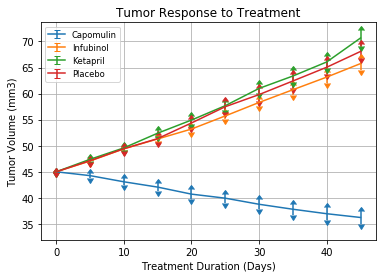

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

#Get min and max values for the avg tumor volume so we set limits on Y
min_volume = tumor_response_df.min()['Avg. Tumor Vol.']
min_volume = min_volume -3
max_volume = tumor_response_df.max()['Avg. Tumor Vol.']
max_volume = max_volume +3
#print(min_volume)
#print(max_volume)

#set y-axis limits
plt.ylim(min_volume, max_volume)

#Define X axis
time = list(avg_volume_pivot.index.values)
#ax.set_xlim(time)

plt.errorbar(time, cap_means, cap_sem, uplims=True, lolims=True, label = "Capomulin")
#plt.errorbar(time, ceft_means, ceft_sem, uplims=True, lolims=True, label = "Ceftamin")
plt.errorbar(time, infub_means, infub_sem, uplims=True, lolims=True, label = "Infubinol")
plt.errorbar(time, keta_means, keta_sem, uplims=True, lolims=True, label = "Ketapril")
#plt.errorbar(time, naft_means, naft_sem, uplims=True, lolims=True, label = "Naftisol")
plt.errorbar(time, placebo_means, placebo_sem, uplims=True, lolims=True, label = "Placebo")
#plt.errorbar(time, prop_means, prop_sem, uplims=True, lolims=True, label = "Propriva")
#plt.errorbar(time, rami_means, rami_sem, uplims=True, lolims=True, label = "Ramicane")
#plt.errorbar(time, stel_means, stel_sem, uplims=True, lolims=True, label = "Stelasyn")
#plt.errorbar(time, z_means, z_sem, uplims=True, lolims=True, label = "Zoniferol")


#Scatterplot labels
plt.grid(True)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best", fontsize="small", frameon=True)

plt.show()
#save output
plt.savefig('Tumor Response.png') 

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame # Preview DataFrame

metas_response = clinical_mouse_df.groupby(['Drug', 'Timepoint'])
metas_response_avg = metas_response.mean()

# Convert to DataFrame
metas_avg_df = pd.DataFrame(metas_response_avg.reset_index())
metas_avg_df = metas_avg_df.loc[:, ["Drug", "Timepoint", "Metastatic Sites"]]
metas_avg_df = metas_avg_df.rename(columns={"Metastatic Sites": "Avg. Metastatic Response"})

# Preview DataFrame

metas_avg_df.head()


,Drug,Timepoint,Avg. Metastatic Response
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metas_response_sem = metas_response.sem()

# Convert to DataFrame
metas_sem_df = pd.DataFrame(metas_response_sem.reset_index())
metas_sem_df = metas_sem_df.loc[:, ["Drug", "Timepoint", "Metastatic Sites"]]
metas_sem_df = metas_sem_df.rename(columns={"Metastatic Sites": "Std. Err. Metastatic Response"})


# Preview DataFrame
metas_sem_df.head()

,Drug,Timepoint,Std. Err. Metastatic Response
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
metas_avg_pivot = metas_avg_df.pivot(index='Timepoint', columns = 'Drug', values = 'Avg. Metastatic Response')
metas_avg_pivot = pd.DataFrame(metas_avg_pivot)
metas_avg_pivot = metas_avg_pivot.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
metas_avg_pivot.astype(float)
metas_avg_pivot


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [11]:
metas_sem_pivot = metas_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'Std. Err. Metastatic Response')
metas_sem_pivot = metas_sem_pivot.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
metas_sem_pivot.astype(float)
metas_sem_pivot
# Preview that Reformatting worked

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [12]:
#lists of mean and std err values for each drug to graph
#metas_avg_pivot
#metas_sem_pivot

#Capomulin
cap_met_means = metas_avg_pivot.loc[:, ['Capomulin']]
cap_met_means = cap_met_means['Capomulin']
cap_met_sem = metas_sem_pivot.loc[:, ['Capomulin']]
cap_met_sem = cap_met_sem['Capomulin']

#Infubinol
infub_met_means = metas_avg_pivot.loc[:, ['Infubinol']]
infub_met_means = infub_met_means['Infubinol']
infub_met_sem = metas_sem_pivot.loc[:, ['Infubinol']]
infub_met_sem = infub_met_sem['Infubinol']

#Ketapril
keta_met_means = metas_avg_pivot.loc[:, ['Ketapril']]
keta_met_means = keta_met_means['Ketapril']
keta_met_sem = metas_sem_pivot.loc[:, ['Ketapril']]
keta_met_sem = keta_met_sem['Ketapril']

#Placebo
placebo_met_means = metas_avg_pivot.loc[:, ['Placebo']]
placebo_met_means = placebo_met_means['Placebo']
placebo_met_sem = metas_sem_pivot.loc[:, ['Placebo']]
placebo_met_sem = placebo_met_sem['Placebo']


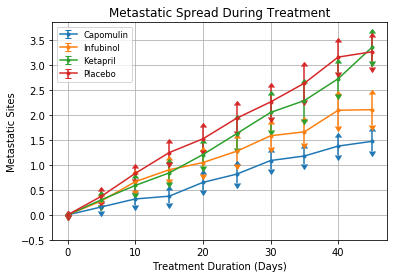

In [31]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

#Get min and max values for the avg tumor volume so we set limits on Y
met_min = metas_avg_df.min()['Avg. Metastatic Response']
met_min = met_min - .5
met_max = metas_avg_df.max()['Avg. Metastatic Response']
met_max = met_max + .5

#set y-axis limits
plt.ylim(met_min, met_max)

#Define X axis
time = list(metas_avg_pivot.index.values)


plt.errorbar(time, cap_met_means, cap_met_sem, uplims=True, lolims=True, marker = ".", label = "Capomulin")
plt.errorbar(time, infub_met_means, infub_met_sem, uplims=True, lolims=True, marker = ".", label = "Infubinol")
plt.errorbar(time, keta_met_means, keta_met_sem, uplims=True, lolims=True, marker = ".", label = "Ketapril")
plt.errorbar(time, placebo_met_means, placebo_met_sem, uplims=True, lolims=True, marker = ".", label = "Placebo")


#Scatterplot labels
plt.grid(True)
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best", fontsize="small", frameon=True)

plt.show()
#save output
#plt.savefig('Metastatic Spread.png') 

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

#new DF with mice, drug and timepoint
mice_survival_df = pd.DataFrame({'Mice' : clinical_mouse_df['Mouse ID'],
                                         'Drug' : clinical_mouse_df['Drug'], 'Timepoint' : clinical_mouse_df['Timepoint']})
mice_survival_df.head()

#group DF by drug and timepoint and make new DF
mice_survival = mice_survival_df.groupby(['Drug', 'Timepoint'])
mice_survival_count = mice_survival.count()
survival_count_df = pd.DataFrame(mice_survival_count.reset_index())
survival_count_df = survival_count_df.rename(columns={'Mice' : 'Mouse Count'})

survival_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
survival_percent_df = pd.DataFrame({"Drug" : survival_count_df['Drug'], "Timepoint": survival_count_df['Timepoint'],
                                    "Survival %" : (survival_count_df['Mouse Count'] / 25) * 100})
survival_percent_df.head()

,Drug,Timepoint,Survival %
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [16]:
# Minor Data Munging to Re-Format the Data Frames

survival_percent_pivot = survival_percent_df.pivot(index='Timepoint', columns = 'Drug', values = 'Survival %')
survival_percent_pivot = survival_percent_pivot.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
survival_percent_pivot.astype(float)

# Preview the Data Frame
survival_percent_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


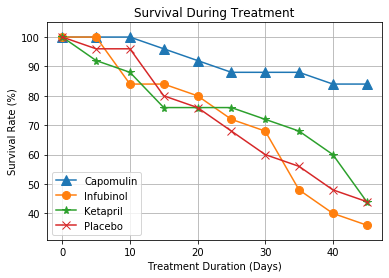

In [29]:
# Generate the Plot (Accounting for percentages)
min_survival_percent = survival_percent_pivot.min()
min_survival_percent = min_survival_percent.min()
minimum = min_survival_percent - 5

#Assign the x-axis values
x_axis = list(survival_percent_pivot.index.values)

#Assign the survival rates for each drug to variables
cap_survival_percent = survival_percent_pivot.loc[:, ['Capomulin']]
infub_survival_percent = survival_percent_pivot.loc[:, ['Infubinol']]
keta_survival_percent = survival_percent_pivot.loc[:, ['Ketapril']]
placebo_survival_percent = survival_percent_pivot.loc[:, ['Placebo']]

#set limtis to the plot
plt.ylim(minimum, 105)

plt.plot(x_axis, cap_survival_percent, marker = "^", ms = 10, label = "Capomulin")
plt.plot(x_axis, infub_survival_percent, marker = "o", ms = 8, label = "Infubinol")
plt.plot(x_axis, keta_survival_percent, marker = "*", ms = 8, label = "Ketapril")
plt.plot(x_axis, placebo_survival_percent, marker = "x", ms = 8, label = "Placebo")

#insert labels
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(frameon=True)

# Save the Figure
plt.savefig('Survival Rates.png') 

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [30]:
#Calculate the percent changes for each drug
tumor_pct_changes = avg_volume_pivot.pct_change(periods=9).dropna()
tumor_pct_changes = tumor_pct_changes.reset_index()
#tumor_pct_changes = tumor_pct_changes.loc[:,["Capomulin", "Infubinol", "Ketapril", "Placebo"]]


indexv = tumor_pct_changes.keys()
tumor_pct_changes


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45,-0.194753,0.425165,0.461235,0.570288,0.539233,0.51298,0.472412,-0.223209,0.520851,0.465798


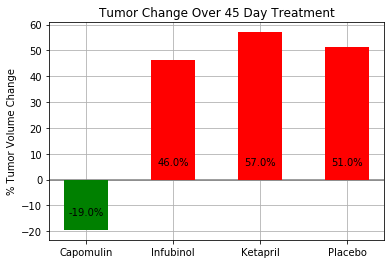

In [19]:
# Store all Relevant Percent Changes into a Tuple

tumor_pct_changes = tumor_pct_changes.loc[:,["Capomulin", "Infubinol", "Ketapril", "Placebo" ]]
cap_vol_change = round(tumor_pct_changes['Capomulin'][0] * 100, 2)
infub_vol_change = round(tumor_pct_changes['Infubinol'][0] * 100, 2)
keta_vol_change = round(tumor_pct_changes['Ketapril'][0] * 100, 2)
placebo_vol_change = round(tumor_pct_changes['Placebo'][0] * 100, 2)

#list of tuples
tumor_vol_changes = [cap_vol_change, infub_vol_change, keta_vol_change, placebo_vol_change]
tumor_vol_changes

#drug names will be used on the x-axis of the bar chart
drugs_array = tumor_pct_changes.columns.values
drugs_array
x_axis = np.arange(len(drugs_array))

# Splice the data between passing and failing drugs
#set variables that determine if the tumor volume change is above or below 0.
threshold = 0
above_threshold = np.maximum(tumor_vol_changes, threshold)
below_threshold = np.minimum(tumor_vol_changes, threshold)


#BUILD THE PLOT

#Assign 3 to the zorder argument so that the bars are in front of the grid.
#Make the width of the bars 0.5 so that there is space between them.

fig, ax = plt.subplots()
plt.bar(x_axis, below_threshold, 0.5, color="g", zorder=3)
plt.bar(x_axis, above_threshold, 0.5, color="r", zorder=3)

# Orient widths. Add labels, tick marks, etc. 

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.axhline(0, color='grey')
ax.grid(zorder=0)

#percent on each bar
labels = [str(round(cap_vol_change)) + "%", str(round(infub_vol_change)) + "%", str(round(keta_vol_change)) + "%", 
                  str(round(placebo_vol_change)) + "%"]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

#drug names on the x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs_array)
        
# Save the Figure
plt.savefig('Tumor Change After 45 Days.png') 

#Display the figure
plt.show()




# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)